FFR 120  
Felix Waldschock

HW 2  
Exercise 7.6

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','grid'])
from tqdm import trange


In [93]:
# parameters
n_drift = 50
n_diff = 2

L = 100         # length of the box
sigma = 1       
dT = 0.1
dT = 1
x0 = 0          # initial position of the particle
alpha = 1
sigma0 = 1
dSigma = 1.8 



In [94]:
# Simulation parameters
N = 10000                                   # number of trajectiories (particles)
#T_tot = [10, 100, 1000, 10000, 100000]      # total time
T_tot = [10, 100, 1000, 10000]              # total time
T_tot = np.array(T_tot)
Iteration_Steps = T_tot * (1 / dT)          # total number of steps 
max_steps = int(np.max(Iteration_Steps))    # maximum number of steps

trajectories = np.zeros((N, len(T_tot)))    # array to store trajectories  
sigmas = np.zeros(N)



In [95]:
def getDrift(x, x_old):
    return np.mean(x - x_old) / (n_drift * dT)

In [96]:
def getDiff(x, x_old):
    return np.mean((x - x_old)**2) / (2*n_diff * dT)

In [97]:
# constant noise simulation ex 7.2

def simulate_trajectory_constant(N, max_steps, L):
    x = np.zeros(N)*x0
    x_old_drift = np.ones(N)*x0
    x_old_diff = np.ones(N)*x0
    trajectories = np.zeros((N, len(T_tot)))            # array to store trajectories  
    sigmas_ = np.zeros(N)                               # array to store sigmas
    drift = np.zeros((int(max_steps/n_drift),2))                         # array to store drift
    diffusion = np.zeros((int(max_steps/n_diff),2))                      # array to store diffusion

    for s in trange(max_steps):
        # calc new sigma
        o = sigma + np.sqrt(dT)
        directions = np.random.choice([-1, 1], N)
        x += directions * o
        
        # check boundaries and apply correction
        x = np.where(x < -L/2, -L - x, x)
        x = np.where(x > L/2, L - x, x)

        # calc drift and diffusion
        drift[int(s/n_drift)] = getDrift(x, x_old_drift), np.mean(x)
        diffusion[int(s/n_diff)] = getDiff(x, x_old_diff), np.mean(x)

        if (s%n_drift == 0):
            x_old_drift = x.copy()
        
        if (s%n_diff == 0):
            x_old_diff = x.copy()
        
        if s in Iteration_Steps:
            index = np.where(Iteration_Steps == s)[0][0]
            trajectories[:, index] = x

        

    trajectories[:, -1] = x
    sigmas_[:] = sigma

    return trajectories, sigmas_, drift, diffusion



In [98]:
# multiplicative noise 
def simulate_trajectory_multiplicative(N, max_steps, L, alpha):
    x = np.ones(N)*x0
    x_old_drift = np.ones(N)*x0
    x_old_diff = np.ones(N)*x0
    trajectories = np.zeros((N, len(T_tot)))            # array to store trajectories  
    sigmas_ = np.zeros(N)                               # array to store sigmas
    drift = np.zeros((int(max_steps/n_drift),2))                         # array to store drift
    diffusion = np.zeros((int(max_steps/n_diff),2))                      # array to store diffusion

    for s in trange(max_steps):
        
        # get new noise
        sigma = np.zeros(N)
        # multiplicative noise
        tmp1 = sigma0 + dSigma*x/L
        tmp2 = dSigma * dT / L
        tmp3 = tmp1 * np.sqrt(dT)
        direction = np.random.choice([-1,1], N)
        sigma = alpha * tmp1 * tmp2 + tmp3 * direction
        
        x += sigma

        # check boundaries and apply correction
        x = np.where(x < -L/2, -L - x, x)
        x = np.where(x > L/2, L - x, x)

        # calc drift and diffusion
        drift[int(s/n_drift)] = getDrift(x, x_old_drift), np.mean(x)
        diffusion[int(s/n_diff)] = getDiff(x, x_old_diff), np.mean(x)

        if (s%n_drift == 0):
            x_old_drift = x.copy()
        
        if (s%n_diff == 0):
            x_old_diff = x.copy()

        if s in Iteration_Steps:
            index = np.where(Iteration_Steps == s)[0][0]
            trajectories[:, index] = x

    trajectories[:, -1] = x
    sigmas_ = sigma

    return trajectories, sigmas_, drift, diffusion


In [99]:
# Run constant simulation
trajectories_constant, sigmas_constant, drift_constant, diffusion_constant = simulate_trajectory_constant(N, max_steps, L)


100%|██████████| 10000/10000 [00:01<00:00, 8922.56it/s]


In [100]:
# Run multiplicative simulation
trajectories_multiplicative, sigmas_multiplicative, drift_multiplicative, diffusion_multiplicative = simulate_trajectory_multiplicative(N, max_steps, L, alpha)

100%|██████████| 10000/10000 [00:01<00:00, 7052.21it/s]


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-0.7512  , -0.723056, -0.694912, -0.666768, -0.638624, -0.61048 ,
        -0.582336, -0.554192, -0.526048, -0.497904, -0.46976 , -0.441616,
        -0.413472, -0.385328, -0.357184, -0.32904 , -0.300896, -0.272752,
        -0.244608, -0.216464, -0.18832 , -0.160176, -0.132032, -0.103888,
        -0.075744, -0.0476  , -0.019456,  0.008688,  0.036832,  0.064976,
         0.09312 ,  0.121264,  0.149408,  0.177552,  0.205696,  0.23384 ,
         0.261984,  0.290128,  0.318272,  0.346416,  0.37456 ,  0.402704,
         0.430848,  0.458992,  0.487136,  0.51528 ,  0.543424,  0.571568,
         0.599712,  0.627856,  0.656   ]),
 <a list of 200 BarContainer objects>)

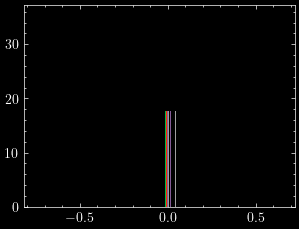

In [103]:
# plot the drift and the diffusion in a 2 x 3 subplot
#fig, ax = plt.subplots(2, 3, figsize=(12, 8))
bins = 50

# plot the drift
plt.hist(drift_constant.T, bins=bins, density=True, label='constant noise')
# ax[0,1].hist(drift_multiplicative.T, bins=bins, density=True, label='multiplicative noise')
#plt.scatter(drift_constant[:,1], drift_constant[:,0], label='constant noise')
#plt.scatter(drift_multiplicative[:,1], drift_multiplicative[:,0], label='multiplicative noise')